# Task-2: Movie Rating Prediction

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Data Gathering**

In [51]:
mrp = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')

In [52]:
mrp.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [53]:
mrp.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [54]:
mrp.shape

(15509, 10)

**Data Pre-Processing**

In [55]:
mrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [56]:
mrp.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [57]:
mrp = mrp.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3'])

In [58]:
mrp.shape

(12365, 10)

**Data Cleaning**

In [59]:
import re
mrp['Year'] = mrp['Year'].apply(lambda x: int(re.findall(r'\d+', x)[0]) if not pd.isna(x) else x)

In [60]:
mrp.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [61]:
mrp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12365 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      12365 non-null  object 
 1   Year      12074 non-null  float64
 2   Duration  6691 non-null   object 
 3   Genre     11368 non-null  object 
 4   Rating    7627 non-null   float64
 5   Votes     7628 non-null   object 
 6   Director  12365 non-null  object 
 7   Actor 1   12365 non-null  object 
 8   Actor 2   12365 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.0+ MB


In [62]:
mrp.isnull().sum()

Name           0
Year         291
Duration    5674
Genre        997
Rating      4738
Votes       4737
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [63]:
mrp['Year'].fillna(mrp['Year'].mean(), inplace=True)

In [64]:
mrp['Year'] = mrp['Year'].astype('int64')

In [65]:
mrp.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1988,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [66]:
mrp.isnull().sum()

Name           0
Year           0
Duration    5674
Genre        997
Rating      4738
Votes       4737
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [67]:
mrp['Duration'] = mrp['Duration'].str.replace('min', '').astype(float)

In [68]:
mrp.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1988,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [69]:
mrp.isnull().sum()

Name           0
Year           0
Duration    5674
Genre        997
Rating      4738
Votes       4737
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [70]:
mrp['Duration'].fillna(mrp['Duration'].mean(), inplace=True)

In [71]:
mrp.isnull().sum()

Name           0
Year           0
Duration       0
Genre        997
Rating      4738
Votes       4737
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [72]:
mrp['Genre'].fillna(mrp['Genre'].mode()[0], inplace=True)

In [73]:
mrp.isnull().sum()

Name           0
Year           0
Duration       0
Genre          0
Rating      4738
Votes       4737
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [74]:
mrp['Rating'].fillna(mrp['Rating'].mean(), inplace=True)

In [75]:
mrp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12365 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      12365 non-null  object 
 1   Year      12365 non-null  int64  
 2   Duration  12365 non-null  float64
 3   Genre     12365 non-null  object 
 4   Rating    12365 non-null  float64
 5   Votes     7628 non-null   object 
 6   Director  12365 non-null  object 
 7   Actor 1   12365 non-null  object 
 8   Actor 2   12365 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.0+ MB


In [76]:
import re

print(mrp.loc[9502, 'Votes'])
value = str(mrp.loc[9502, 'Votes'])
extracted_number = re.sub(r'[^\d.]', '', value)
if extracted_number:  # Check if the extracted number is not empty
    mrp.loc[9502, 'Votes'] = float(extracted_number) * 1000000
else:
    print("Warning: No number found in the original value.")

nan


In [77]:
# For converting "Vote" column's data into float value

import re

def convert_to_float(x):
    if isinstance(x, str):
        x = x.replace(",", "")  # Remove commas
        x = re.sub(r'[^\d.]', '', x)  # Remove non-numeric characters
        if x:
            return float(x)
        else:
            return None
    else:
        return x

mrp['Votes'] = mrp['Votes'].apply(convert_to_float)

In [78]:
mrp.loc[9502, 'Votes'] = 5160000

In [79]:
mrp.loc[9502]

Name          Mooso-the Mouse
Year                     1988
Duration                 89.0
Genre          Drama, Western
Rating               5.815602
Votes               5160000.0
Director    Deepankar Prakash
Actor 1        Yashpal Sharma
Actor 2        Brijendra Kala
Actor 3        Rajendra Gupta
Name: 9502, dtype: object

In [80]:
mrp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12365 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      12365 non-null  object 
 1   Year      12365 non-null  int64  
 2   Duration  12365 non-null  float64
 3   Genre     12365 non-null  object 
 4   Rating    12365 non-null  float64
 5   Votes     7629 non-null   float64
 6   Director  12365 non-null  object 
 7   Actor 1   12365 non-null  object 
 8   Actor 2   12365 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.3+ MB


In [81]:
mrp = mrp.dropna(subset=['Votes'])

In [82]:
mrp.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [83]:
mrp

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.000000,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.000000,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.000000,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.000000,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.000000,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,131.099537,"Action, Crime, Drama",5.3,135.0,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125.000000,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,131.099537,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129.000000,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


**Data Visualization and Analysis**

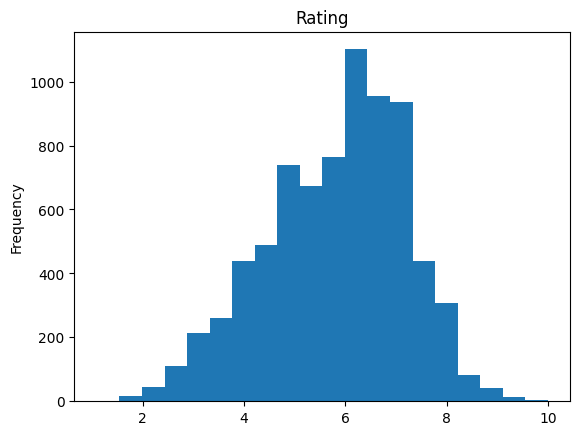

In [84]:
mrp['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(True)

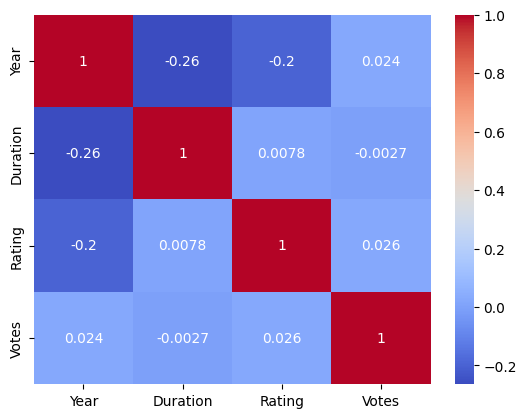

In [85]:
# Correlation Matrix

numeric_mrp = mrp.select_dtypes(include=['number'])   # Select only numeric columns for correlation calculation
corr_matrix = numeric_mrp.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


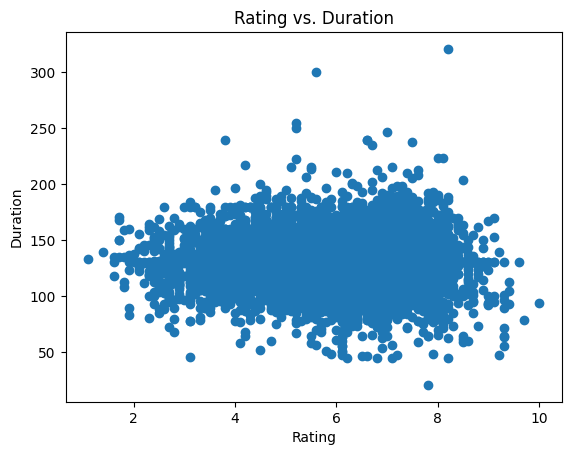

In [86]:
# Scatter Plot for Rating vs. Duration

plt.scatter(mrp['Rating'], mrp['Duration'])
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.title('Rating vs. Duration')
plt.show()

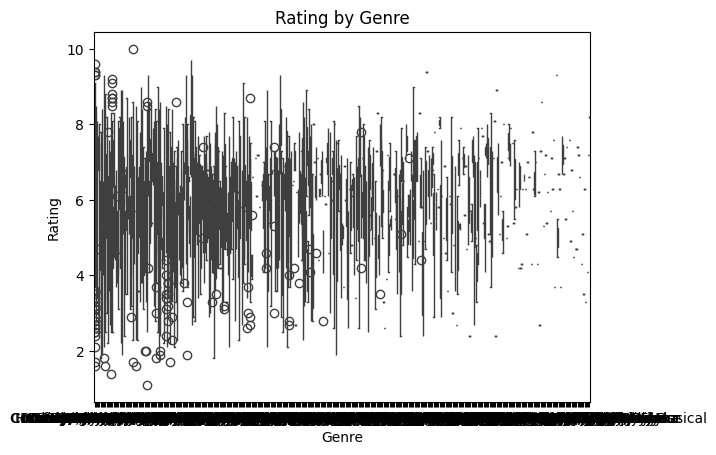

<Figure size 640x30000 with 0 Axes>

<Figure size 40000x480 with 0 Axes>

In [87]:
# Box Plot for Rating by Genre

sns.boxplot(x='Genre', y='Rating', data=mrp)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Rating by Genre')
plt.figure().set_figheight(300)
plt.figure().set_figwidth(400)
plt.show()


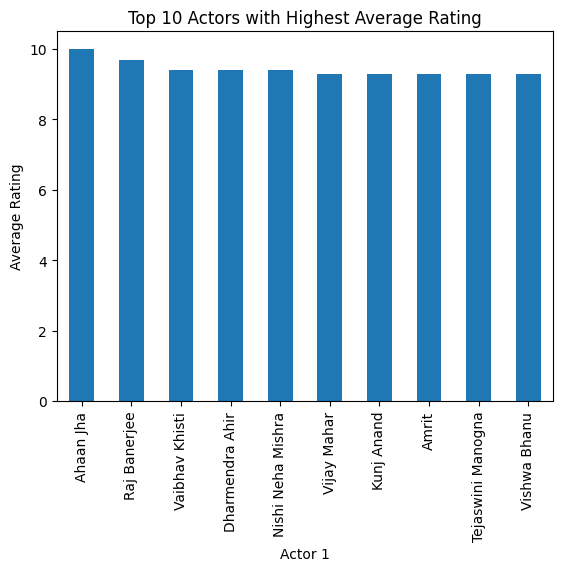

In [88]:
# Bar Plot for Average Rating by Actor 1

avg_rating_by_actor1 = mrp.groupby('Actor 1')['Rating'].mean().sort_values(ascending=False)
avg_rating_by_actor1[:10].plot(kind='bar')
plt.xlabel('Actor 1')
plt.ylabel('Average Rating')
plt.title('Top 10 Actors with Highest Average Rating')
plt.show()

**Training & Testing Module**

In [89]:
mrp.describe()

,Year,Duration,Rating,Votes
count,7629.000000,7629.000000,7629.000000,7.629000e+03
mean,1993.077861,132.873784,5.815602,2.686721e+03
std,20.338844,21.886653,1.367621,6.022395e+04
min,1917.000000,21.000000,1.100000,5.000000e+00
25%,1979.000000,125.000000,4.900000,1.700000e+01
50%,1996.000000,131.099537,6.000000,5.900000e+01
75%,2011.000000,144.000000,6.800000,4.480000e+02
max,2021.000000,321.000000,10.000000,5.160000e+06


In [90]:
X = mrp[['Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Duration', 'Votes']]
y = mrp['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (6103, 6)
Shape of X_test: (1526, 6)
Shape of y_train: (6103,)
Shape of y_test: (1526,)


In [91]:
X

,Genre,Actor 1,Actor 2,Actor 3,Duration,Votes
1,Drama,Rasika Dugal,Vivek Ghamande,Arvind Jangid,109.000000,8.0
3,"Comedy, Romance",Prateik,Ishita Raj,Siddhant Kapoor,110.000000,35.0
5,"Comedy, Drama, Musical",Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,147.000000,827.0
6,"Drama, Romance, War",Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,142.000000,1086.0
8,"Horror, Mystery, Thriller",Yash Dave,Muntazir Ahmad,Kiran Bhatia,82.000000,326.0
...,...,...,...,...,...,...
15501,"Action, Crime, Drama",Dharmendra,Moushumi Chatterjee,Govinda,131.099537,135.0
15503,"Action, Crime, Drama",Chiranjeevi,Jayamalini,Rajinikanth,125.000000,44.0
15504,Action,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,131.099537,11.0
15505,"Action, Drama",Akshay Kumar,Twinkle Khanna,Aruna Irani,129.000000,655.0


In [92]:
y = pd.cut(mrp['Rating'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

**Model Training**

***Logistic Regression***

In [93]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X = mrp[['Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Duration', 'Votes']]

# Discretize ratings *before* the split
y = pd.cut(mrp['Rating'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a transformer to handle categorical features
# Handle unknown categories by ignoring them
categorical_features = ['Genre', 'Actor 1', 'Actor 2', 'Actor 3']
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

# Create a pipeline that includes the transformer and the logistic regression model
pipeline = Pipeline([
    ('transformer', transformer),
    ('logreg', LogisticRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

acc_logreg = accuracy_score(y_test, y_pred)

print("Accuracy of Logistic Regression model:", acc_logreg)

Accuracy of Logistic Regression model: 0.5255570117955439


***KNN Model***

In [94]:
# K-Neighbours Classifier

from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X = mrp[['Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Duration', 'Votes']]

# Discretize ratings *before* the split
y = pd.cut(mrp['Rating'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['Genre', 'Actor 1', 'Actor 2', 'Actor 3']
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('transformer', transformer),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

acc_KNN = accuracy_score(y_test, y_pred)

print("Accuracy of KNN model:", acc_KNN)

Accuracy of KNN model: 0.46068152031454784


***SVM Model***

In [95]:
# SVM Model

from sklearn import svm
svm = svm.SVC()
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X = mrp[['Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Duration', 'Votes']]

# Discretize ratings *before* the split
y = pd.cut(mrp['Rating'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['Genre', 'Actor 1', 'Actor 2', 'Actor 3']
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('transformer', transformer),
    ('SVM',svm)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

acc_SVM = accuracy_score(y_test, y_pred)

print("Accuracy of SVM model:", acc_SVM)

Accuracy of SVM model: 0.5360419397116645


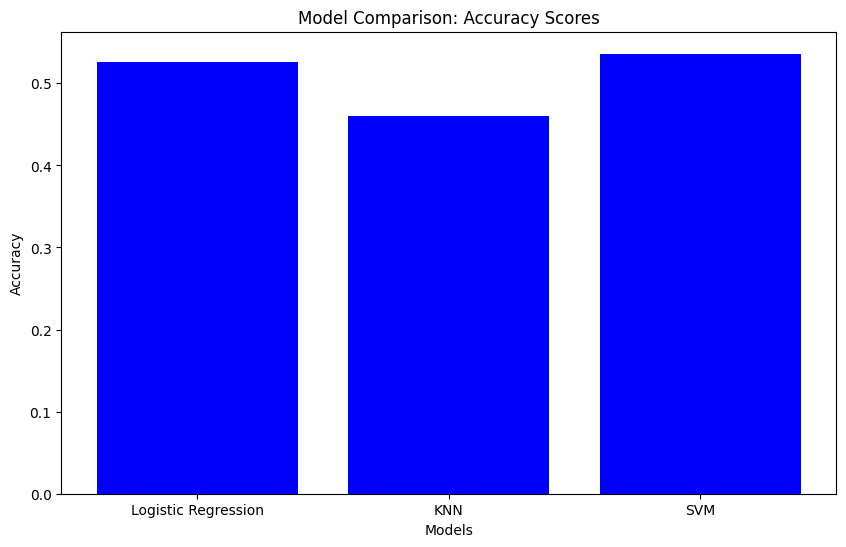

In [96]:
# A bar chart which shows the accuracy scores of the models

models = ['Logistic Regression', 'KNN', 'SVM']
accuracies = [acc_logreg, acc_KNN, acc_SVM]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='Blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy Scores')
plt.show()
